In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import functions as FF

In [12]:
# %%
df = pd.read_csv("Datasets//kaggle//body-fat//bodyfat.csv")
# df["BMI"] = 
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [13]:
df["Weight"] = df["Weight"].apply(func=FF.lbs_to_kg).values
df["Height"] = df["Height"].apply(func=FF.inch_to_m).values
df.loc[:, "Neck":"Wrist"] = df.loc[:, "Neck":"Wrist"].apply(func=FF.cm_to_m).values
df["BMI"] = FF.calc_BMI(df["Weight"].values, df["Height"].values)
df["BMI_cat_2"] = df["BMI"].apply(func=FF.classify_BMI_2).values
df["BMI_cat_4"] = df["BMI"].apply(func=FF.classify_BMI_4).values

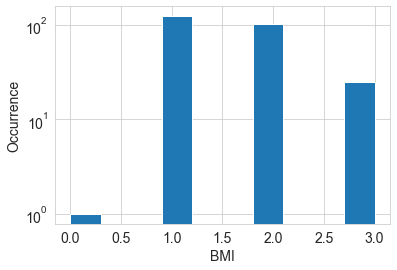

In [14]:
# Plot the histogram of the review counts
sns.set_style("whitegrid")
fig, ax = plt.subplots()
df["BMI_cat_4"].hist(ax=ax) #, bins=50)
ax.set_yscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("BMI", fontsize=14)
ax.set_ylabel("Occurrence", fontsize=14)
plt.show()